# Assignment 2

# Numpy, Pandas, Matplotlib, Data Cleaning and Pandas SQL 

<h1>2.1. Problem Statement: Numpy </h1>

<u><h5>Problem Statement 1</h5></u><br/>
Write a function so that the columns of the output matrix are powers of the input vector. 

The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1. 
 
HINT: Such a matrix with a geometric progression in each row is named for AlexandreTheophile Vandermonde

In [10]:
import numpy as np
import pandas as pd
x = np.array([1, 2, 3, 5])
N = 3
np.vander(x, N)

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [25,  5,  1]])

<u><h5>Problem Statement 2</h5></u><br/>
Question: Write a function to find moving average in an array over a window: Test it over [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150] and window of 3. 

In [62]:
dataset = [3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150]
def MovingAverage(values,window):
    x = np.repeat(1,window)/window
    ma = np.convolve(values,x,'valid')
    return ma

In [63]:
print (MovingAverage(dataset,3))

[  5.           4.66666667   5.66666667   6.66666667   9.66666667
  28.66666667  49.33333333  72.66666667  84.          93.33333333
 116.33333333]


<h1>2.2. Problem Statement: Pandas </h1>

<u><h5>Problem Statement 1</h5></u><br/>
1) How-to-count-distance-to-the-previous-zero 
 
For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position 
 
Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} 
 
The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'. 
 import pandas as pd 
 
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]}) 

In [14]:
# Python3 program to find closest 0 
# for every element 
import numpy as np
import pandas as pd
# Print the distance with zeroes of 
# every element 
def print_distance(arr, n): 

# initializes an array of size n with 0 
    ans = [0 for i in range(n)] 
	
	# if first element is 0 then the 
	# distance will be 0 
    if (arr[0] == 0): 
        ans[0] = 0
    else: 
        ans[0] = 10**9 # if not 0 then initialize 
						# with a maximum value 

	# traverse in loop from 1 to n and 
	# store the distance from left 
    for i in range(1, n): 

		# add 1 to the distance from 
		# previous one 
        ans[i] = ans[i - 1] + 1

		# if the present element is 0 then 
		# distance will be 0 
        if (arr[i] == 0): 
            ans[i] = 0

	# if last element is zero then it will be 0 
	# else let the answer be what was found when 
	# traveled form left to right 
    if (arr[n - 1] == 0): 
        ans[n - 1] = 0

	# traverse from right to left and store 
	# the minimum of distance if found from 
	# right to left or left to right 
    for i in range(n - 2, -1, -1): 

		# store the minimum of distance from 
		# left to right or right to left 
        ans[i] = min(ans[i], ans[i + 1] + 1) 

		# if it is 0 then minimum will 
		# always be 0 
        if (arr[i] == 0): 
            ans[i] = 0
	
	# print the answer array 
    for i in ans: 
        print(i, end = " ") 

# Driver Code 
a = [2, 1, 0, 3, 0, 0, 3, 2, 4] 
n = len(a) 
print_distance(a, n) 

2 1 0 1 0 0 1 2 3 

2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. 

In [4]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

In [9]:
print(s)

2015-01-01    0.144229
2015-01-02    0.177527
2015-01-05    0.389043
2015-01-06    0.037433
2015-01-07    0.469181
2015-01-08    0.452504
2015-01-09    0.406663
2015-01-12    0.907573
2015-01-13    0.921645
2015-01-14    0.618494
2015-01-15    0.926585
2015-01-16    0.704198
2015-01-19    0.788392
2015-01-20    0.193718
2015-01-21    0.770068
2015-01-22    0.560541
2015-01-23    0.871279
2015-01-26    0.542263
2015-01-27    0.831480
2015-01-28    0.415457
2015-01-29    0.813458
2015-01-30    0.410087
2015-02-02    0.742491
2015-02-03    0.482021
2015-02-04    0.951725
2015-02-05    0.307431
2015-02-06    0.654861
2015-02-09    0.175404
2015-02-10    0.528154
2015-02-11    0.936828
                ...   
2015-11-20    0.545754
2015-11-23    0.747622
2015-11-24    0.692810
2015-11-25    0.062583
2015-11-26    0.695358
2015-11-27    0.569711
2015-11-30    0.551958
2015-12-01    0.016453
2015-12-02    0.277024
2015-12-03    0.548578
2015-12-04    0.589485
2015-12-07    0.660916
2015-12-08 

3) Find the sum of the values in s for every Wednesday

In [6]:
s[dti.weekday == 2].sum()

26.346965308996506

4) Average For each calendar month 

In [11]:
s.resample('M').mean()

2015-01-31    0.561446
2015-02-28    0.454571
2015-03-31    0.489724
2015-04-30    0.490097
2015-05-31    0.508455
2015-06-30    0.525657
2015-07-31    0.451426
2015-08-31    0.430162
2015-09-30    0.423441
2015-10-31    0.570434
2015-11-30    0.518903
2015-12-31    0.484705
Freq: M, dtype: float64

5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [13]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-15
2015-05-31   2015-05-21
2015-09-30   2015-07-23
2016-01-31   2015-10-14
Freq: 4M, dtype: datetime64[ns]

<u><h5>Problem Statement 1</h5></u><br/>
Read the dataset from the below link 
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Nam es_right.csv
 

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
data.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


1) Delete unnamed columns

In [20]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [21]:
data.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


2) Show the distribution of male and female 

In [58]:
data.groupby(['Gender']).count()[['Count']].head()

,Count
Gender,
F,558846
M,457549


3) Show the top 5 most preferred names

In [67]:
n = 5
data['Name'].value_counts()[:n]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

4) What is the median name occurrence in the dataset

In [107]:
data['Name'].mode()

0    Riley
dtype: object

5) Distribution of male and female born count by states 

In [86]:
data.groupby(['State','Gender']).count()[['Count']]

Count
State Gender       
AK    F        2404
      M        2587
AL    F        9878
      M        8419
AR    F        7171
      M        6475
AZ    F       14518
      M       10820
CA    F       45144
      M       31637
CO    F       11424
      M        9183
CT    F        6575
      M        5733
DC    F        3053
      M        3000
DE    F        2549
      M        2440
FL    F       25781
      M       20070
GA    F       19385
      M       15454
HI    F        3255
      M        3546
IA    F        7131
      M        6307
ID    F        4918
      M        4833
IL    F       21268
      M       16828
...             ...
OK    F        9519
      M        8138
OR    F        8604
      M        7333
PA    F       17480
      M       14171
RI    F        2558
      M        2468
SC    F        9465
      M        8195
SD    F        2838
      M        2908
TN    F       13063
      M       10588
TX    F       39760
      M       27791
UT    F        9515
      M        8233
VA    F       14759
      M       11997
VT    F        1398
      M        1618
WA    F       13329
      M       11049
WI    F       10549
      M        8940
WV    F        4305
      M        3733
WY    F        1456
      M        1904

[102 rows x 1 columns]

<h1>2.3. Problem Statement: Use Cases on Numpy and Pandas</h1>

1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as: 
 
Output: 
 
1) If the List element is a alphabet or string, the output will be 
 
The entry is a Oops! <class 'ValueError'> occured. Next entry. 
 
2) If the List element is “0”,the output will be 
 
The entry is 0 Oops! <class 'ZeroDivisionError'> occured.  Next entry. 
 
3) If the List element is and integer except 0,then output will be: 
 
The entry is 2 The reciprocal of 2 is 0.5 // reciprocal of an integer

In [111]:
# import module sys to get the type of exception
import sys

randomList = ['a', 0, 2]

for entry in randomList:
    try:
        print("The entry is", entry)
        r = 1/int(entry)
        break
    except:
        print("Oops!",sys.exc_info()[0],"occured.")
        print("Next entry.")
        print()
print("The reciprocal of",entry,"is",r)

The entry is a
Oops! <class 'ValueError'> occured.
Next entry.

The entry is 0
Oops! <class 'ZeroDivisionError'> occured.
Next entry.

The entry is 2
The reciprocal of 2 is 0.5


2) Array out of Bound Exception 
 
Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except) 

In [17]:
list = [1,3,6,7]
try:
    getindex = list[10]
    print("la valeur de index est :", getindex)
except IndexError:
    print("Array Out of Bound")

Array Out of Bound


3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.
Note : The module created as fibo.py has to be placed in lib folder 
 
For linux/ubuntu path = /home/anaconda/lib/python3 For Windows path = C:\Users\Ajit\Anaconda3\Lib

In [19]:
import fibo as fb
fb.fib2(1000)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py. 

In [24]:
import palindrome as pl


In [22]:
pl.isPalindrome("radar")

True

In [23]:
pl.isPalindrome("chicken")

False

5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [25]:
def encrypt(text,s): 
    result = "" 
  
    for i in range(len(text)): 
        char = text[i] 
  
        # Encrypt uppercase characters 
        if (char.isupper()): 
            result += chr((ord(char) + s-65) % 26 + 65) 
  
        # Encrypt lowercase characters 
        else: 
            result += chr((ord(char) + s - 97) % 26 + 97) 
  
    return result 

In [26]:
text = "crypto"
s = 5
encrypt(text,s)

'hwduyt'

6) Get Data from the following link: 
 
http://files.grouplens.org/datasets/movielens/ml-20m.zip 
 
We will be using the following files for this exercise: 
 
ratings.csv : userId,movieId,rating, timestamp tags.csv : userId,movieId, tag, timestamp movies.csv : movieId, title, genres

<i><u> I) Read the dataset using pandas </i></u>

In [53]:
import zipfile as zp
import pandas as pd

zf = zp.ZipFile('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m.zip')
print (zf)

<zipfile.ZipFile filename='C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m.zip' mode='r'>


<i><u>II. Extract the first row from tags and print its type. </i></u>

In [9]:
import numpy as np
import pandas as pd

df_tags = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [10]:
#Extract teh first row and its type : OBJECT
df_tags.iloc[0]

userId                18
movieId             4141
tag          Mark Waters
timestamp     1240597180
Name: 0, dtype: object

In [11]:
##We can also extarct the first row as a dataframe
df_tags.iloc[[0]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


<i><u>III.  Extract row 0, 11, 2000 from tags DataFrame</i></u>

In [6]:
df_tags.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


<i><u>IV.  Print index, columns of the DataFrame.</i></u>

In [120]:
df_tags.index
# We can also print the index as a list : df.index.tolist()

RangeIndex(start=0, stop=465564, step=1)

In [7]:
df_tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

<i><u>V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe(). </i></u>

In [14]:
import numpy as np
import pandas as pd
df_ratings = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [23]:
df_ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<i><u> VI. Filter out ratings with rating > 5 </i></u>

In [9]:
is_rating_sup_5 = df_ratings['rating'] > 5
is_rating_sup_5.head()

0    False
1    False
2    False
3    False
4    False
Name: rating, dtype: bool

In [10]:
result = df_ratings[is_rating_sup_5]
result.head()

,userId,movieId,rating,timestamp


In [11]:
#Same as the solution above
df_ratings[df_ratings.rating > 5]

,userId,movieId,rating,timestamp


<i><u> VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified. </i></u>

In [97]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

<i><u>VIII. Filter out movies from the movies DataFrame that are of type 'Animation'. </i></u>

In [5]:
import numpy as np
import pandas as pd
df_movies = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [108]:
df_movies[df_movies.genres == 'Animation']

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation
13444,66335,Afro Samurai: Resurrection (2009),Animation
13858,69469,Garfield's Pet Force (2009),Animation
14184,71158,Immigrants (L.A. Dolce Vita) (2008),Animation
14492,72603,Merry Madagascar (2009),Animation
14578,72927,Donkey Xote (2007),Animation


In [6]:
df_movies[df_movies.genres == 'Animation'].count()

movieId    83
title      83
genres     83
dtype: int64

<i><u>IX. Find the average rating of movies </i></u>

In [7]:
df_movies.mean()

movieId    59855.48057
dtype: float64

<i><u> X. Perform an inner join of movies and tags based on movieId. </u></i>

In [7]:
import numpy as np
import pandas as pd

df_movies = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/movies.csv')
df_tags = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/tags.csv')
df_join = pd.merge(df_movies,df_tags, on ='movieId',  how='left')
df_join.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644.0,Watched,1.417737e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,computer animation,1.183903e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Disney animated feature,1.183933e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,Pixar animation,1.183935e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741.0,TÃ©a Leoni does not star in this movie,1.245094e+09


<i><u> XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.  </u></i>

In [9]:
#First let's join dataframes "movies.csv" and "ratings.csv"
df_ratings = pd.read_csv('C:/Users/HP/Documents/ACADGILD/Assignment_04_DECEMMBRE_2019/ml-20m/ratings.csv')
df_movies_rating = pd.merge(df_movies,df_ratings, how='inner', left_on ='movieId',  right_on ='movieId')
df_movies_rating.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,944919407
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,858275452
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,833981871
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,943497887
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,1230858821


In [16]:
df_movies_rating[(df_movies_rating.genres == 'Comedy') & (df_movies_rating.rating > 4)].head(5)

,movieId,title,genres,userId,rating,timestamp
87435,5,Father of the Bride Part II (1995),Comedy,117,5.0,861553146
87437,5,Father of the Bride Part II (1995),Comedy,127,5.0,847127740
87455,5,Father of the Bride Part II (1995),Comedy,350,5.0,1360209812
87460,5,Father of the Bride Part II (1995),Comedy,390,5.0,836139583
87462,5,Father of the Bride Part II (1995),Comedy,401,5.0,847049988


<i><u> XII. Split 'genres' into multiple columns. </u></i>

In [13]:
movies_genre = df_movies_rating['genres'].str.split('|')
movies_genre[:10]

0    [Adventure, Animation, Children, Comedy, Fantasy]
1    [Adventure, Animation, Children, Comedy, Fantasy]
2    [Adventure, Animation, Children, Comedy, Fantasy]
3    [Adventure, Animation, Children, Comedy, Fantasy]
4    [Adventure, Animation, Children, Comedy, Fantasy]
5    [Adventure, Animation, Children, Comedy, Fantasy]
6    [Adventure, Animation, Children, Comedy, Fantasy]
7    [Adventure, Animation, Children, Comedy, Fantasy]
8    [Adventure, Animation, Children, Comedy, Fantasy]
9    [Adventure, Animation, Children, Comedy, Fantasy]
Name: genres, dtype: object

<i><u>XIII. Extract year from title e.g. (1995)</u></i>

In [14]:
df_movies_rating['year'] = df_movies_rating['title'].str.extract('.*\((.*)\).*', expand=True)
df_movies_rating.tail()

,movieId,title,genres,userId,rating,timestamp,year
20000258,131254,Kein Bund für's Leben (2007),Comedy,79570,4.0,1427743979,2007
20000259,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,79570,4.0,1427744888,2002
20000260,131258,The Pirates (2014),Adventure,28906,2.5,1427745392,2014
20000261,131260,Rentun Ruusu (2001),(no genres listed),65409,3.0,1427745466,2001
20000262,131262,Innocence (2014),Adventure|Fantasy|Horror,133047,4.0,1427747966,2014


<i><u>XIV. Select rows based on timestamps later than 2015-02-01.</u></i>

In [24]:
df_movies_rating['parsed_time'] = pd.to_datetime(df_movies_rating['timestamp'], unit='s')
greater_than_t = df_movies_rating['parsed_time'] > '2015-02-01'
greater_than_t.head()

0    False
1    False
2    False
3    False
4    False
Name: parsed_time, dtype: bool

<i><u> XV. Sort the tags DataFrame based on timestamp.</u></i>

In [25]:
df_movies_rating.sort_values(by='parsed_time', ascending=True)[:10]

,movieId,title,genres,userId,rating,timestamp,year,parsed_time
6039594,1176,"Double Life of Veronique, The (Double Vie de V...",Drama|Fantasy|Romance,28507,4.0,789652004,1991,1995-01-09 11:46:44
567014,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,131160,5.0,789652009,1995,1995-01-09 11:46:49
5670101,1079,"Fish Called Wanda, A (1988)",Comedy|Crime,131160,3.0,789652009,1988,1995-01-09 11:46:49
294381,21,Get Shorty (1995),Comedy|Crime|Thriller,131160,3.0,789652009,1995,1995-01-09 11:46:49
616526,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,99851,5.0,822873600,1995,1996-01-29 00:00:00
314712,24,Powder (1995),Drama|Sci-Fi,85252,3.0,822873600,1995,1996-01-29 00:00:00
519422,45,To Die For (1995),Comedy|Drama|Thriller,85252,3.0,822873600,1995,1996-01-29 00:00:00
654686,58,"Postman, The (Postino, Il) (1994)",Comedy|Drama|Romance,134445,5.0,822873600,1994,1996-01-29 00:00:00
188470,11,"American President, The (1995)",Comedy|Drama|Romance,134445,4.0,822873600,1995,1996-01-29 00:00:00
611627,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,85252,5.0,822873600,1995,1996-01-29 00:00:00


<h1>2.4. Problem Statement: Matplotlib </h1>

Matplotlib: 
 
This assignment is for visualization using matplotlib: 
 
data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url ="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

df_titanic = pd.read_csv(url)
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<i><u> 1. Create a pie chart presenting the male/female proportion </u></i>

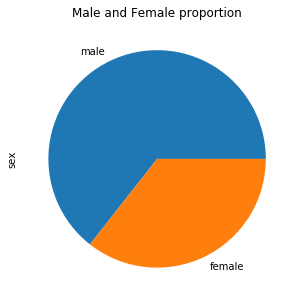

In [11]:
plt.figure(figsize=(5,5))
plt.title('Male and Female proportion')
df_titanic.sex.value_counts().plot(kind = 'pie')

<i><u> 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender </u></i>

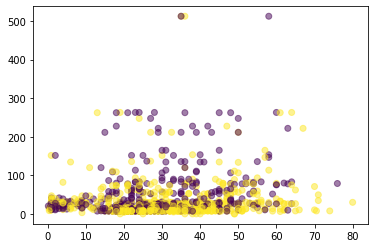

In [22]:
##f, (ax1, ax2) = plt.subplots(1, 2)
colors = {'male': 'red', 'female': 'orange'}
plt.scatter(df_titanic['age'], df_titanic['fare'], alpha=0.5, c=pd.factorize(df_titanic['sex'])[0])
plt.show()

<h1>2.5.Problem Statement Data cleaning </h1>

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis? 
 
Take this monstrosity as the DataFrame to use in the following puzzles: 
 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
 
'Budapest_PaRis', 'Brussels_londOn'], 
 
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 

 
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 
 
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
 
'12. Air France', '"Swiss Air"']}) 

<i><u> 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column). </u></i>

In [21]:
import numpy as np 
import pandas as pd 

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
                  'Budapest_PaRis', 'Brussels_londOn'],
                  'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
                  'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                  'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
                  '12. Air France', '"Swiss Air"']})
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


In [22]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df['FlightNumber']
df.head()

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


<i><u> 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. </u></i>

In [23]:
tDF = pd.DataFrame(df.From_To)
tDF['From'] = tDF.From_To.str.split('_').str.get(0)
tDF['To'] = tDF.From_To.str.split('_').str.get(1)
tDF = tDF.drop('From_To', 1)
tDF.head()

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


<i><u>3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".) </u></i>

In [24]:
tDF['From'] = tDF.From.str.title()
tDF['To'] = tDF.To.str.title()

In [25]:
tDF.head()

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


<i><u> 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions. </u></i>

In [26]:
df.head()
df = df.drop('From_To', 1)
df = pd.concat([tDF,df], axis = 1)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


<i><u> 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 
 
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays. </u></i>

In [27]:
tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['Delay_1', 'Delay_2', 'Delay_3']
df = df.drop('RecentDelays', 1)
df.insert(3, "Delay_1", tDelay['Delay_1'])
df.insert(4, "Delay_2", tDelay['Delay_2'])
df.insert(5, "Delay_3", tDelay['Delay_3'])
print(df)

       From         To  FlightNumber  Delay_1  Delay_2  Delay_3  \
0    London      Paris         10045     23.0     47.0      NaN   
1    Madrid      Milan         10055      NaN      NaN      NaN   
2    London  Stockholm         10065     24.0     43.0     87.0   
3  Budapest      Paris         10075     13.0      NaN      NaN   
4  Brussels     London         10085     67.0     32.0      NaN   

               Airline  
0               KLM(!)  
1    <Air France> (12)  
2  (British Airways. )  
3       12. Air France  
4          "Swiss Air"  


<h1>2.6.Problem Statement : Pandas SQL </h1>

<h3>Problem statement 2: </h3>
 
Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

<i><u>1. Create an sqlalchemy engine using a sample from the data set </u></i>

In [15]:
import sqlalchemy
import pandas as pd
from sqlalchemy import create_engine

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',sep=",",header=None)
df.columns=['age','workclass','fnlwgt','education','educationNum','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
engine = create_engine('sqlite:///myData.db')
df.to_sql('alchemy_adult', engine)

<i><u> 2. Write two basic update queries </u></i>

In [16]:
#First Update Query
print(engine.execute('''UPDATE alchemy_adult
SET income = '<30K'
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

In [17]:
#Print record after Firs update Query
print(engine.execute('''SELECT * FROM alchemy_adult
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

[(0, 39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40, ' United-States', '<30K')]


In [18]:
#Second Update Query
print(engine.execute('''UPDATE alchemy_adult
SET income = '<30K'
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

In [19]:
#Print record after Second update Query
print(engine.execute('''SELECT * FROM alchemy_adult
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[(2, 38, ' Private', 215646, ' HS-grad', 9, ' Divorced', ' Handlers-cleaners', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', '<30K')]


<i><u> 3. Write two delete queries </u></i>

In [20]:
#First delete record
print(engine.execute('''DELETE FROM alchemy_adult
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13'''))

In [21]:
#Print after First delet record (Empty)
print(engine.execute('''SELECT * FROM alchemy_adult
WHERE age=39 and workclass=' State-gov' and fnlwgt=77516
and education=' Bachelors' and educationNum=13 ''').fetchall())

[]


In [22]:
#Second delete record
print(engine.execute('''DELETE FROM alchemy_adult
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9'''))

In [23]:
#Print after second delete record
print(engine.execute('''SELECT * FROM alchemy_adult
WHERE age=38 and workclass=' Private' and fnlwgt=215646
and education=' HS-grad' and educationNum=9''').fetchall())

[]


<i><u> 4. Write two filter queries </u></i>

In [33]:
#First filter query using LIKE (Empty)
print(engine.execute('''SELECT * FROM alchemy_adult WHERE race LIKE ' D%' ''').fetchmany(5))

[]


In [34]:
#Second fliter query using IN
print(engine.execute('''SELECT * FROM alchemy_adult WHERE age  IN(50, 78) ''').fetchmany(10))

[(1, 50, ' Self-emp-not-inc', 83311, ' Bachelors', 13, ' Married-civ-spouse', ' Exec-managerial', ' Husband', ' White', ' Male', 0, 0, 13, ' United-States', ' <=50K'), (53, 50, ' Federal-gov', 251585, ' Bachelors', 13, ' Divorced', ' Exec-managerial', ' Not-in-family', ' White', ' Male', 0, 0, 55, ' United-States', ' >50K'), (216, 50, ' Private', 313321, ' Assoc-acdm', 12, ' Divorced', ' Sales', ' Not-in-family', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'), (259, 50, ' Private', 204518, ' 7th-8th', 4, ' Divorced', ' Craft-repair', ' Not-in-family', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (272, 50, ' Self-emp-not-inc', 30653, ' Masters', 14, ' Married-civ-spouse', ' Farming-fishing', ' Husband', ' White', ' Male', 2407, 0, 98, ' United-States', ' <=50K'), (287, 50, ' Private', 176609, ' Some-college', 10, ' Divorced', ' Other-service', ' Not-in-family', ' White', ' Male', 0, 0, 45, ' United-States', ' <=50K'), (289, 50, ' Private', 193884, ' 7th-8th', 4,

<i><u> 5. Write two function queries </u></i>

In [35]:
#First Query using LENGTH function
print(engine.execute('''SELECT * FROM alchemy_adult
WHERE LENGTH(workclass)==8 ''').fetchmany(5))

[(3, 53, ' Private', 234721, ' 11th', 7, ' Married-civ-spouse', ' Handlers-cleaners', ' Husband', ' Black', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (4, 28, ' Private', 338409, ' Bachelors', 13, ' Married-civ-spouse', ' Prof-specialty', ' Wife', ' Black', ' Female', 0, 0, 40, ' Cuba', ' <=50K'), (5, 37, ' Private', 284582, ' Masters', 14, ' Married-civ-spouse', ' Exec-managerial', ' Wife', ' White', ' Female', 0, 0, 40, ' United-States', ' <=50K'), (6, 49, ' Private', 160187, ' 9th', 5, ' Married-spouse-absent', ' Other-service', ' Not-in-family', ' Black', ' Female', 0, 0, 16, ' Jamaica', ' <=50K'), (8, 31, ' Private', 45781, ' Masters', 14, ' Never-married', ' Prof-specialty', ' Not-in-family', ' White', ' Female', 14084, 0, 50, ' United-States', ' >50K')]


In [36]:
#Second using Upper function (empty)
print(engine.execute('''SELECT sex,upper(sex) FROM alchemy_adult
WHERE LENGTH(workclass)==9 ''').fetchmany(5))

[]


<h3>Problem statement 1: </h3>

Read the following data set: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/ 
 
Rename the columns as per the description from this file: 
 
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names